In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import dask.dataframe as dd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('blockchair_bitcoin_inputs_20210313.tsv.gz', compression='gzip', sep='\t')

In [3]:
df2 = pd.read_csv('blockchair_bitcoin_outputs_20210313.tsv.gz', compression='gzip', sep='\t')

In [4]:
df3 = pd.read_csv('blockchair_bitcoin_inputs_20210418.tsv.gz', compression='gzip', sep='\t')
df4 = pd.read_csv('blockchair_bitcoin_outputs_20210418.tsv.gz', compression='gzip', sep='\t')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885267 entries, 0 to 885266
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   block_id                   885267 non-null  int64  
 1   transaction_hash           885267 non-null  object 
 2   index                      885267 non-null  int64  
 3   time                       885267 non-null  object 
 4   value                      885267 non-null  int64  
 5   value_usd                  885267 non-null  float64
 6   recipient                  885267 non-null  object 
 7   type                       885267 non-null  object 
 8   script_hex                 885267 non-null  object 
 9   is_from_coinbase           885267 non-null  int64  
 10  is_spendable               885267 non-null  int64  
 11  spending_block_id          885267 non-null  int64  
 12  spending_transaction_hash  885267 non-null  object 
 13  spending_index             88

In [6]:
df2.head(5)

,block_id,transaction_hash,index,time,value,value_usd,recipient,type,script_hex,is_from_coinbase,is_spendable
0,674354,211dfdebf598d15eb8b188664d963920991f7df8168bc0...,0,2021-03-13 00:09:18,731741124,418307.1250,1CK6KHY6MHgYvmRQ4PAafKYDrg1ejbH1cE,pubkeyhash,76a9147c154ed1dc59609e3d26abb2df2ea3d587cd8c41...,1,-1
1,674354,211dfdebf598d15eb8b188664d963920991f7df8168bc0...,1,2021-03-13 00:09:18,0,0.0000,d-d4ee8394becc9296404ca86a8cb4284f,nulldata,6a4c2952534b424c4f434b3a1145118858629f0ae3466d...,1,0
2,674354,211dfdebf598d15eb8b188664d963920991f7df8168bc0...,2,2021-03-13 00:09:18,0,0.0000,d-f0c8647d9dc0f4ba895f259ba5d76350,nulldata,6a4c266a24b9e11b6dab79463cfeccbf5ca2e980885d50...,1,0
3,674354,211dfdebf598d15eb8b188664d963920991f7df8168bc0...,3,2021-03-13 00:09:18,0,0.0000,d-4258d4902e60bc88a3755101dbe621ed,nulldata,6a24aa21a9ed8cb9b88ad2036f87ca87ca8c3055fb13c0...,1,0
4,674354,4ba5747cad78e48f1c4634888c771eb97233a3b6ac8b9a...,0,2021-03-13 00:09:18,497517,284.4106,3E6HKvbEhvqTACkMBgBijXVDEwErrJc9W2,scripthash,a9148807ef3523bee90d3d88ba927a5dcf64557f7e7687,0,-1


In [7]:
df_m = df[df['value_usd'] >= 1e6].reset_index(drop=True)
# df_not_m = df[df['value_usd'] < 1e6].reset_index(drop=True)
d_m = df_m.merge(df2, on = 'transaction_hash', how = 'inner')
# d_not_m = df_not_m.merge(df2, on = 'transaction_hash', how = 'inner')

In [8]:
df1_m = df3[df3['value_usd'] > 1e6].reset_index(drop=True)
# df1_not_m = df3[df3['value_usd'] < 1e6].reset_index(drop=True)
d1_m = df1_m.merge(df4, on = 'transaction_hash', how = 'inner')
# d1_not_m = df1_not_m.merge(df4, on = 'transaction_hash', how = 'inner')

In [9]:
dx_m = d_m[['recipient_x', 'recipient_y']]
dx1_m = d1_m[['recipient_x', 'recipient_y']]

In [10]:
# dx_m = d_m[['recipient_x', 'recipient_y']]
# dx_not_m = d_not_m[['recipient_x', 'recipient_y']]
# dx1_m = d1_m[['recipient_x', 'recipient_y']]
# dx1_not_m = d1_not_m[['recipient_x', 'recipient_y']]

In [11]:
G = nx.Graph()
G = nx.from_pandas_edgelist(dx_m, 'recipient_x', 'recipient_y',
                            create_using=nx.DiGraph())


In [12]:
# G1 = nx.Graph()
# G1 = nx.from_pandas_edgelist(dx_not_m, 'recipient_x', 'recipient_y',
#                             create_using=nx.DiGraph())


In [15]:
G2 = nx.Graph()
G2 = nx.from_pandas_edgelist(dx1_m, 'recipient_x', 'recipient_y',
                             create_using=nx.DiGraph())


In [ ]:
# G3 = nx.Graph()
# G3 = nx.from_pandas_edgelist(dx1_not_m, 'recipient_x', 'recipient_y',
#                             create_using=nx.DiGraph())

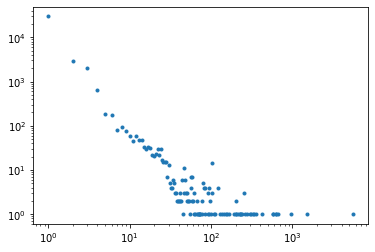

In [16]:
plt.loglog(nx.degree_histogram(G),'.');

In [ ]:
# plt.loglog(nx.degree_histogram(G1),'.');

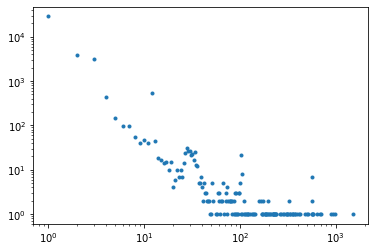

In [18]:
plt.loglog(nx.degree_histogram(G2),'.');

In [ ]:
# plt.loglog(nx.degree_histogram(G3),'.');

In [21]:
def clust_coef(net):
    cc = nx.clustering(net)
    avg_clust = sum(cc.values()) / len(cc)
    return avg_clust
#     print(f'Average clustering coefficient = {avg_clust}')
def ave_deg(net):
    degrees1 = [k for node, k in nx.degree(net)]
    k_min1 = np.min(degrees1)
    k_max1 = np.max(degrees1)
    k_avg1 = np.mean(degrees1)
    return [k_min1, k_max1, k_avg1]
#     print ('Minimum degree: ', k_min1)
#     print ('Maximum degree: ', k_max1)
#     print ('Average degree: ', k_avg1)

In [22]:
cols = ['Network', 'Min Degree', 'Max Degree', 'Ave. Degree', 'Clustering Coefficient']
df_metrics = pd.DataFrame(columns=cols)

df_metrics.loc[0] = ['Apr13, > 1M', ave_deg(G)[0], ave_deg(G)[1],
                     ave_deg(G)[2], clust_coef(G)]

# df_metrics.loc[1] = ['Apr13, < 1M', ave_deg(G1)[0], ave_deg(G1)[1],
#                      ave_deg(G1)[2], clust_coef(G1)]

df_metrics.loc[1] = ['Apr18, > 1M', ave_deg(G2)[0], ave_deg(G2)[1],
                     ave_deg(G2)[2], clust_coef(G2)]

# df_metrics.loc[3] = ['Apr18, < 1M', ave_deg(G3)[0], ave_deg(G3)[1],
#                      ave_deg(G3)[2], clust_coef(G3)]

df_metrics

,Network,Min Degree,Max Degree,Ave. Degree,Clustering Coefficient
0,"Apr13, > 1M",1,5479,2.361937,0.076085
1,"Apr18, > 1M",1,1502,2.843300,0.134086


In [ ]:
# nx.number_strongly_connected_components(G)

In [ ]:
# dist = [(in_values.count(v)) for k, v in in_degrees]

In [ ]:
# in_degrees

In [ ]:
# plt.figure(figsize=(15,10))
# plt.axis('off')

# pos = nx.spring_layout(G, k=0.18)
# nx.draw_networkx(G, pos = pos, cmap = plt.cm.RdYlBu, 
#                 node_size = 100, with_labels = False)

# ax = plt.gca()
# ax.collections[0].set_edgecolor("black")

# # plt.suptitle('Network Graph of the Social Network')
# plt.show()

In [ ]:
# degrees = [k for node, k in nx.degree(G)]
# k_min = np.min(degrees)
# k_max = np.max(degrees)
# k_avg = np.mean(degrees)

# print ('Minimum degree: ', k_min)
# print ('Maximum degree: ', k_max)
# print ('Average degree: ', k_avg)
# clust_coef(G)

In [ ]:
# G1 = nx.Graph()
# G1 = nx.from_pandas_edgelist(dx_not_m, 'recipient_x', 'recipient_y',
#                             create_using=nx.DiGraph())

In [ ]:
# plt.loglog(nx.degree_histogram(G),'.');

In [ ]:
# degrees = [k for node, k in nx.degree(G1)]
# k_min = np.min(degrees)
# k_max = np.max(degrees)
# k_avg = np.mean(degrees)

# print ('Minimum degree: ', k_min)
# print ('Maximum degree: ', k_max)
# print ('Average degree: ', k_avg)
# clust_coef(G1)